In [25]:
import requests
import os
import json
from dotenv import load_dotenv

load_dotenv()

def build_url(start_date, end_date, symbols="NVDA", limit=50):

    """Build the Alpaca news API URL for given dates and symbols."""

    start = f"{start_date}T00%3A00%3A00Z"
    end = f"{end_date}T23%3A59%3A59Z"
    base_url = "https://data.alpaca.markets/v1beta1/news"
    return f"{base_url}?start={start}&end={end}&symbols={symbols}&limit={limit}"


def get_news(start_date, end_date):

    """Fetch news for a given start and end date."""

    url = build_url(start_date, end_date)
    headers = {
        "accept": "application/json",
        "APCA-API-KEY-ID": os.getenv("APCA-API-KEY-ID"),
        "APCA-API-SECRET-KEY": os.getenv("APCA-API-SECRET-KEY")
    }
    response = requests.get(url, headers=headers)
        
    return response.json().get("news", [])


def fetch_and_save_news():

    """Fetch news from January 6, 2025, to January 31, 2025, and save created_at, headline, and summary."""

    all_news = {"news": []}

    for day in range(6, 32):
        if day < 10:
            date = f"2025-01-0{day}"
        else:
            date = f"2025-01-{day}"

        daily_news = get_news(date, date)
        
        # extract only created_at, headline, and summary
        for item in daily_news:
            news_item = {
                "created_at": item.get("created_at"),
                "headline": item.get("headline"),
                "summary": item.get("summary", "")
            }
            all_news["news"].append(news_item)
    
    # save the combined news data to a JSON file
    with open("../data/january_news.json", "w") as file:
        json.dump(all_news, file, indent=4)
    
    print(f"Total articles fetched: {len(all_news['news'])}")


fetch_and_save_news()

Total articles fetched: 405


In [1]:
import json
from collections import Counter
import re


def count_words(text):

    """Helper function to count words in a string using RegEx"""

    return len(re.findall(r'\b\w+\b', text))


data_file = "../data/january_news.json"
with open(data_file, "r") as file:
    data = json.load(file)["news"]


### Number of articles without a summary
articles_without_summary = [item for item in data if not item["summary"].strip()]
num_articles_without_summary = len(articles_without_summary)
print(f"Number of articles without a summary: {num_articles_without_summary}")


### Average length of headline and summary combined (word count)
total_word_count = 0
date_word_counts = {} # a dictionary where each key is a date and the value is a list of word counts for each article on that date

for item in data:
    combined_text = f"{item['headline']} {item['summary']}"
    word_count = count_words(combined_text)
    total_word_count += word_count
    
    date = item["created_at"].split("T")[0]
    if date not in date_word_counts:
        date_word_counts[date] = []
    date_word_counts[date].append(word_count)

average_word_count = total_word_count / len(data)
print(f"Average length of headline and summary combined: {average_word_count:.2f} words")


### Number of articles per day
articles_per_day = Counter(item["created_at"].split("T")[0] for item in data)


### Top 10 most frequently occurring words
stop_words = {"with", "in", "and", "to", "the", "of", "as", "at", "on", "is", "a", "s", "for"}
all_words = []

for item in data:
    combined_text = f"{item['headline']} {item['summary']}"
    words = re.findall(r'\b\w+\b', combined_text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    all_words.extend(filtered_words)

top_10_words = Counter(all_words).most_common(10)
print("Top 10 most frequently occurring words:", top_10_words)

Number of articles without a summary: 126
Average length of headline and summary combined: 35.33 words
Top 10 most frequently occurring words: [('nvidia', 308), ('ai', 296), ('stocks', 165), ('39', 159), ('deepseek', 110), ('stock', 88), ('market', 83), ('tech', 72), ('semiconductor', 72), ('trump', 58)]


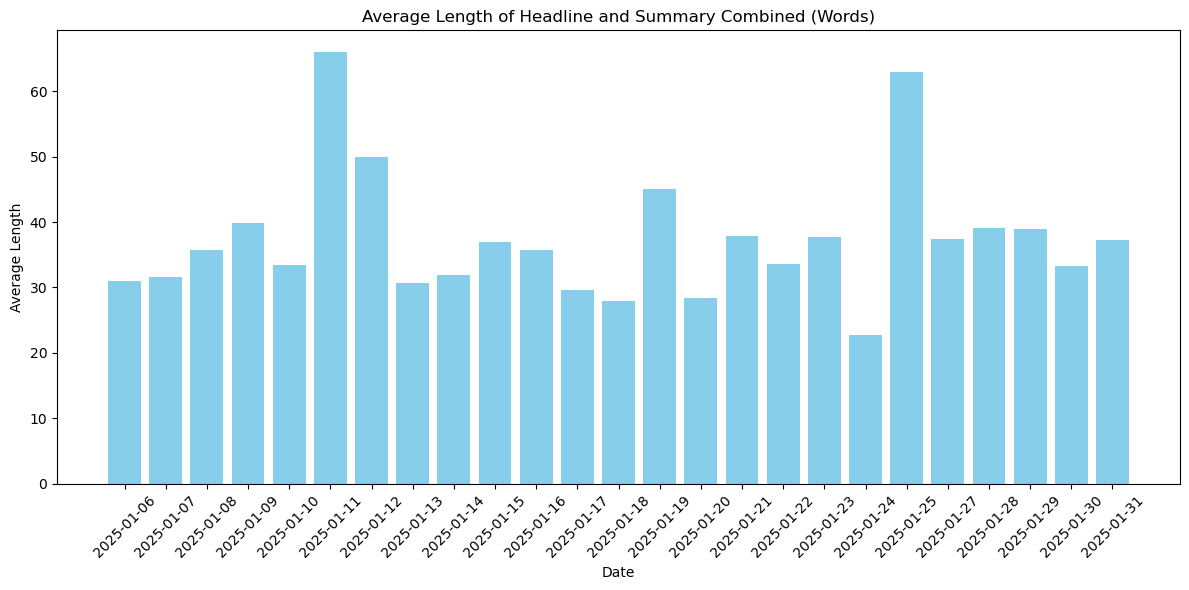

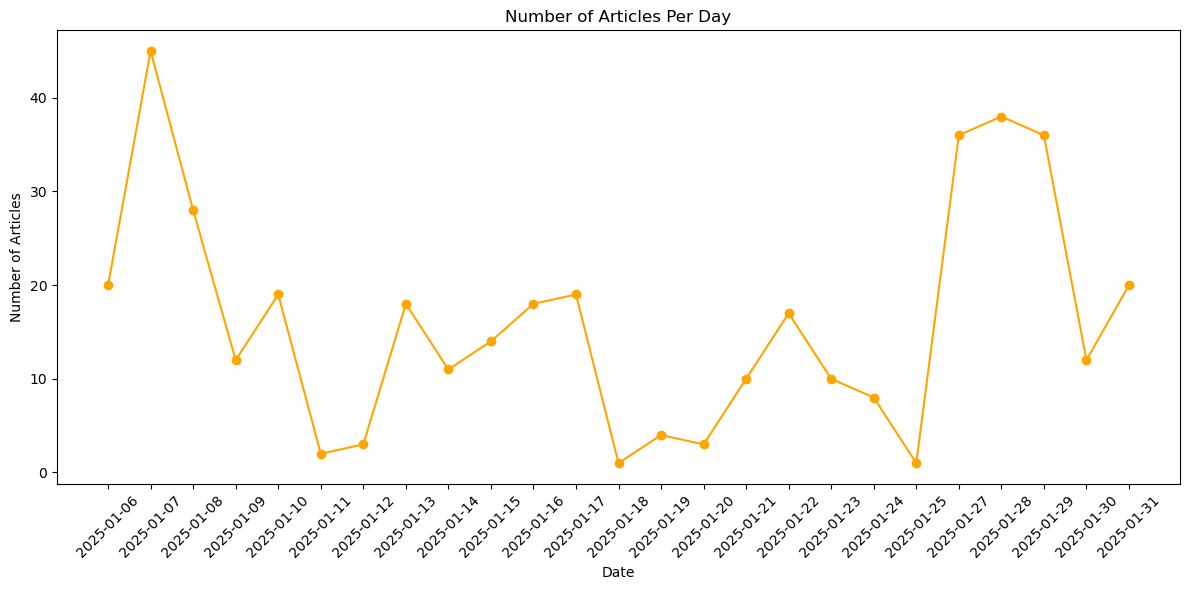

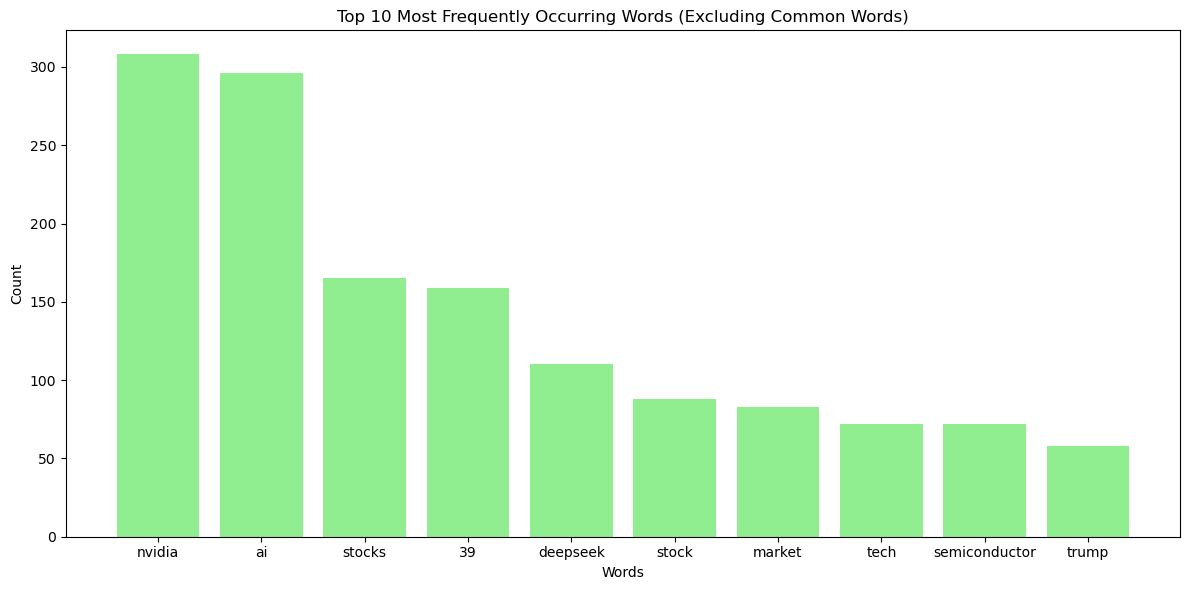

In [ ]:
import matplotlib.pyplot as plt

### Bar graph for average length of news headline and summary combined
average_length_per_day = {date: sum(lengths) / len(lengths) for date, lengths in date_word_counts.items()}

plt.figure(figsize=(12, 6))
plt.bar(average_length_per_day.keys(), average_length_per_day.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title("Average Length of Headline and Summary Combined (Words)")
plt.xlabel("Date")
plt.ylabel("Average Length")
plt.tight_layout()
plt.show()

### Line graph for number of articles each day
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day.keys(), articles_per_day.values(), marker='o', linestyle='-', color='orange')
plt.xticks(rotation=45)
plt.title("Number of Articles Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

### Bar graph for top 10 most frequently occurring words
words, counts = zip(*top_10_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='lightgreen')
plt.title("Top 10 Most Frequently Occurring Words (Excluding Common Words)")
plt.xlabel("Words")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
'''placeholder'''

In [2]:
import pandas as pd

df_prices = pd.read_csv("../data/prices_data.csv")

In [3]:
df_prices

,date,price
0,2025-01-06 00:00:00-05:00,148.59
1,2025-01-07 00:00:00-05:00,153.03
2,2025-01-08 00:00:00-05:00,142.58
3,2025-01-10 00:00:00-05:00,137.45
4,2025-01-13 00:00:00-05:00,129.99
5,2025-01-14 00:00:00-05:00,136.05
6,2025-01-15 00:00:00-05:00,133.65
7,2025-01-16 00:00:00-05:00,138.64
8,2025-01-17 00:00:00-05:00,136.69
9,2025-01-21 00:00:00-05:00,139.16


/var/folders/df/8zbylny96ss0x8q0rhq6rk0c0000gn/T/ipykernel_2901/201628691.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


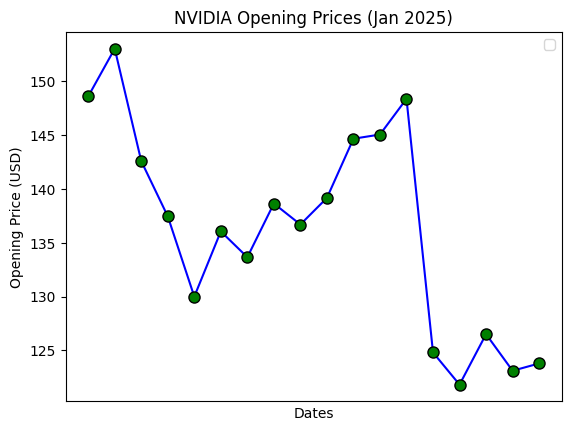

In [4]:
import matplotlib.pyplot as plt

plt.plot(df_prices["date"], df_prices["price"], marker='o', linestyle='-', color='b', 
         markerfacecolor='green', markeredgecolor='black', markersize=8)
plt.xlabel("Dates")
plt.ylabel("Opening Price (USD)")
plt.title("NVIDIA Opening Prices (Jan 2025)")
plt.xticks([])

plt.legend()

plt.show()

<Axes: >

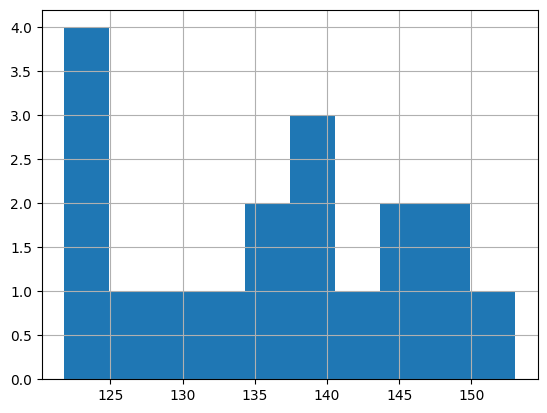

In [7]:
df_prices["price"].hist()

In [8]:
df_prices["price"].describe()

count     18.000000
mean     136.327778
std        9.682519
min      121.810000
25%      127.372500
50%      137.070000
75%      144.140000
max      153.030000
Name: price, dtype: float64

## Analytics EDA

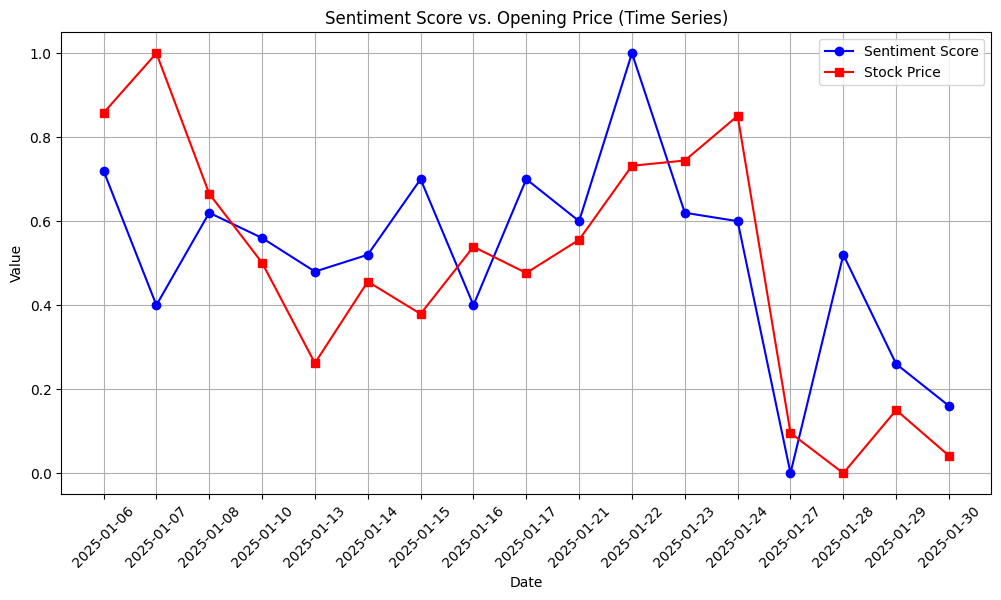

In [122]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/Users/wdgstl/UVA/DS/MarketSentimentAnalysis/data/scores_with_prices.csv')

scaler = MinMaxScaler()
df[["score_norm", "price_norm"]] = scaler.fit_transform(df[["Sentiment Score", "price"]])

plt.figure(figsize=(12, 6))

plt.plot(df["date"], df["score_norm"], marker='o', linestyle='-', label="Sentiment Score", color='blue')
plt.plot(df["date"], df["price_norm"], marker='s', linestyle='-', label="Stock Price", color='red')

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Sentiment Score vs. Opening Price (Time Series)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

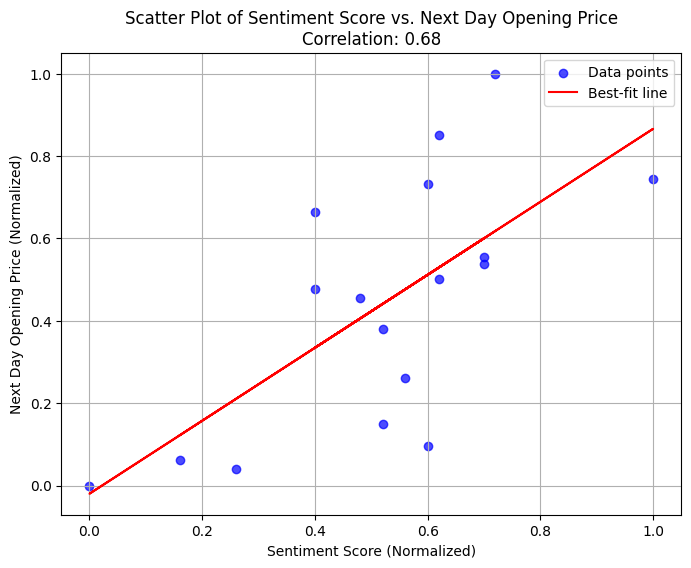

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/Users/wdgstl/UVA/DS/MarketSentimentAnalysis/data/scores_with_prices.csv')
scaler = MinMaxScaler()
df[["score_norm", "price_norm"]] = scaler.fit_transform(df[["Sentiment Score", "Next Day Price"]])

correlation = np.corrcoef(df["score_norm"], df["price_norm"])[0, 1]
m, b = np.polyfit(df["score_norm"], df["price_norm"], 1)

plt.figure(figsize=(8, 6))
plt.scatter(df["score_norm"], df["price_norm"], alpha=0.7, color='blue', label="Data points")
plt.plot(df["score_norm"], m * df["score_norm"] + b, color='red', label="Best-fit line")  # Regression line
plt.xlabel("Sentiment Score (Normalized)")
plt.ylabel("Next Day Opening Price (Normalized)")
plt.title(f"Scatter Plot of Sentiment Score vs. Next Day Opening Price\nCorrelation: {correlation:.2f}")
plt.legend()
plt.grid(True)
plt.show()


##STRONG AND POSITIVE CORRELATION